In [87]:
import pandas as pd
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA

In [30]:
OpenWeatherMap = pd.read_csv(Path('Materials/OpenWeatherMap/283bc5149218e9c8104cbc4d2369cd43.csv'))
OpenWeatherMap = OpenWeatherMap.drop(columns=['lat','lon','weather_icon'])
OpenWeatherMap.dt = OpenWeatherMap.dt.astype('datetime64[s]')

In [157]:
OpenWeatherMap.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_1h',
       'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description'],
      dtype='object')

In [158]:
amsterdam = OpenWeatherMap[["dt","temp","temp_min","temp_max"]]
amsterdam['temp'] = amsterdam['temp']-273.15

<ipython-input-158-3fce9c1028be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amsterdam['temp'] = amsterdam['temp']-273.15


In [159]:
amsterdam = amsterdam.set_index('dt');

In [160]:
month_mean = amsterdam[['temp']].resample('M').mean()

In [161]:
month_mean[month_mean.index.month==1].head(5)

,temp
dt,
1979-01-31,-2.620793
1980-01-31,0.726649
1981-01-31,3.331260
1982-01-31,1.434301
1983-01-31,6.313159


In [162]:
model = ARIMA(month_mean[:-1], order=(5,1,1))
model_fit = model.fit()
# forecast
result = model_fit.get_forecast()

In [163]:
test = month_mean.iloc[-1]

In [164]:
# summarize forecast and confidence intervals
print('Expected: %.3f' % result.predicted_mean)
print('Forecast: %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)
ci = result.conf_int(0.05)
print('95%% Interval: %.3f to %.3f' % (ci.iloc[0][0], ci.iloc[0][1]))

Expected: 5.003
Forecast: 0.442
Standard Error: 1.895
95% Interval: 1.290 to 8.717


In [165]:
amsterdamjan = amsterdam[amsterdam.index.month==1]

<AxesSubplot:>

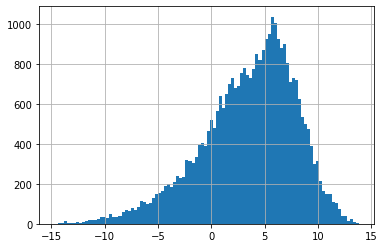

In [166]:
amsterdamjan['temp'].hist(bins=100)

In [188]:
print("Temp will be between {:.2f} and {:.2f}".format(amsterdamjan['temp'].quantile(0.05),amsterdamjan['temp'].quantile(0.95)))

Temp will be between -4.83 and 9.65


In [197]:
model = ARIMA(month_mean[:-1], order=(5,1,1))
model_fit = model.fit()
result = model_fit.get_forecast()
forecast = result.predicted_mean
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
	print(result.conf_int(alpha=a))
    

            lower temp  upper temp
2021-02-28    2.575428    7.431537
            lower temp  upper temp
2021-02-28    1.887108    8.119856
            lower temp  upper temp
2021-02-28    1.290094    8.716871
            lower temp  upper temp
2021-02-28    0.123262    9.883702


,lower temp,upper temp
2021-02-28,0.123262,9.883702
